In [20]:
library(FlashGraphR)
library(rhdf5)

In [2]:
h5ls("/root/cloud_based.h5")

,group,name,otype,dclass,dim
0,/,instance0,H5I_DATASET,INTEGER,7803528 x 2
1,/,instance1,H5I_DATASET,INTEGER,7803528 x 2
2,/,instance2,H5I_DATASET,INTEGER,7803528 x 2
3,/,instance3,H5I_DATASET,INTEGER,7803528 x 2
4,/,instance4,H5I_DATASET,INTEGER,7803528 x 2
5,/,instance5,H5I_DATASET,INTEGER,7803528 x 2
6,/,instance6,H5I_DATASET,INTEGER,7803528 x 2
7,/,instance7,H5I_DATASET,INTEGER,7803528 x 2
8,/,instance8,H5I_DATASET,INTEGER,7803528 x 2
9,/,instance9,H5I_DATASET,INTEGER,7803528 x 2


In [21]:
data <- h5read("/root/cloud_based.h5", "instance0")

In [22]:
range(data)
dim(data)

[1]     0 31345

[1] 7803528       2

In [23]:
write.table(data, file="/root/cloud_based1.txt", row.names=FALSE, col.names=FALSE)

In [24]:
dg <- fg.load.graph("/root/cloud_based1.txt", directed = TRUE, in.mem = TRUE)

In [25]:
ug <- fg.load.graph("/root/cloud_based1.txt", directed = FALSE, in.mem = TRUE)

In [26]:
dg

FlashGraph _root_cloud_based1.txt (D): 31346 7803528

In [27]:
ug

FlashGraph _root_cloud_based1.txt (U): 31346 7803528

In [28]:
in.deg <- fg.degree(dg, mode="in")
out.deg <- fg.degree(dg, mode="out")

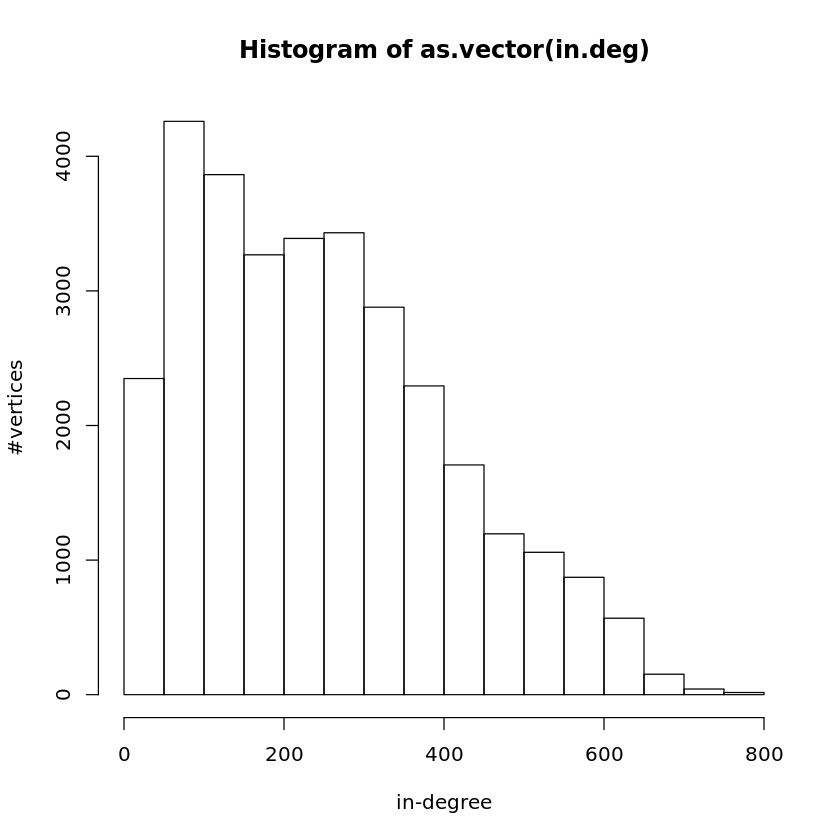

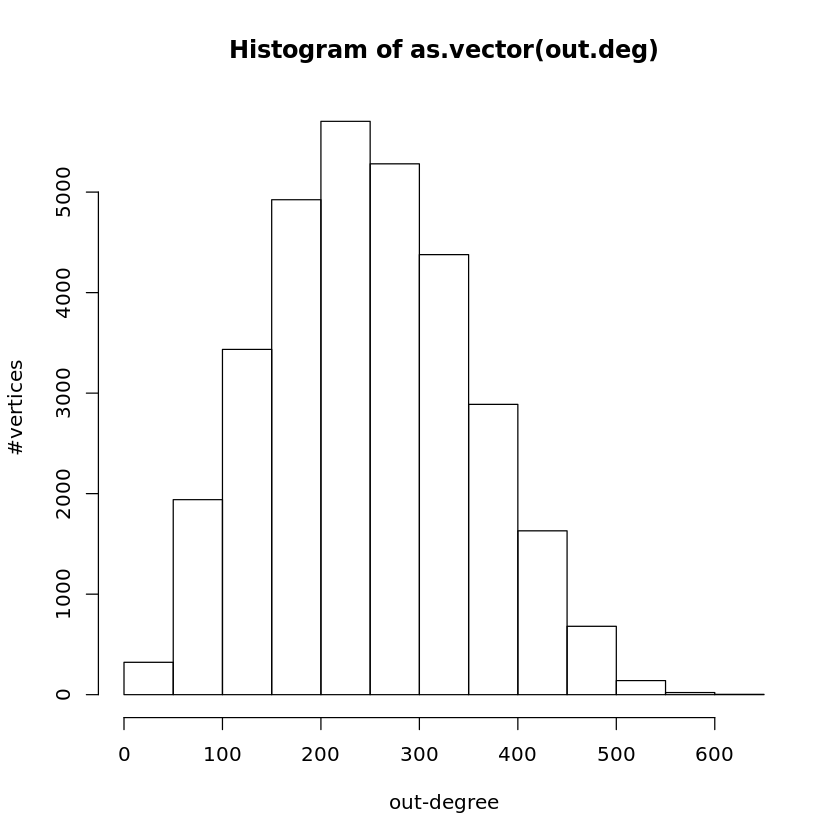

In [12]:
hist(as.vector(in.deg), xlab="in-degree", ylab="#vertices")
hist(as.vector(out.deg), xlab="out-degree", ylab="#vertices")

[1] 253 134 277 205 140 201

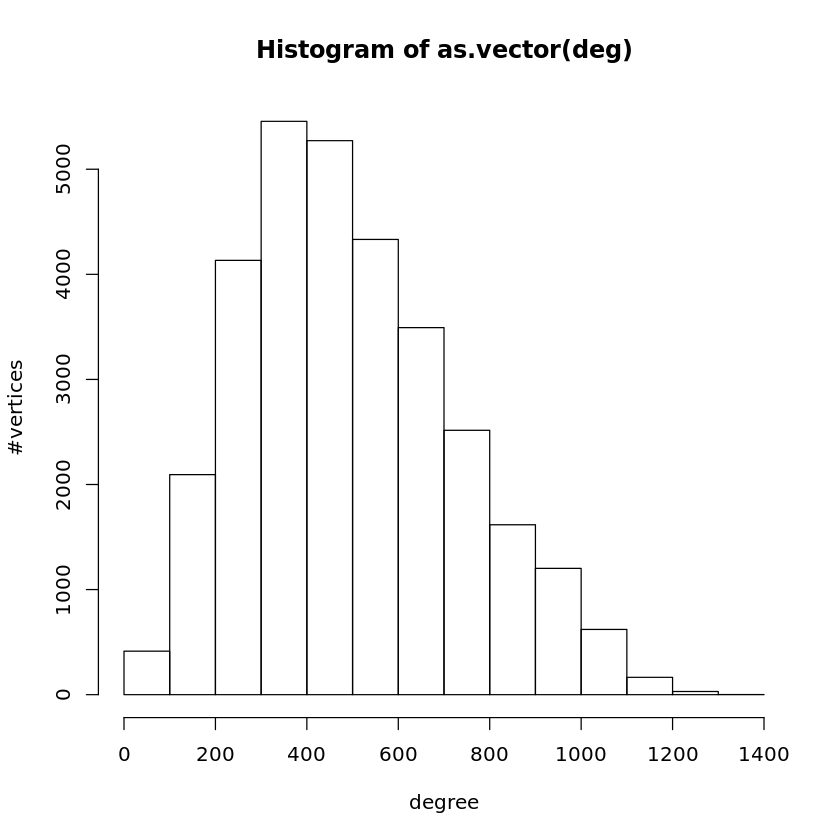

In [13]:
deg <- fg.degree(ug, mode="out")
as.vector(head(deg))
hist(as.vector(deg), xlab="degree", ylab="#vertices")

In [14]:
pg <- fg.page.rank(dg)

In [15]:
s <- sort(as.vector(pg), decreasing = TRUE, index.return=TRUE)
mat <- cbind(head(s$ix), head(s$x))
colnames(mat) <- c("vid", "PageRank")
print(mat)

       vid PageRank
[1,] 13490 3.227344
[2,] 13771 3.113547
[3,] 23056 3.088462
[4,] 22099 3.072039
[5,] 22905 3.033474
[6,] 12784 3.021586


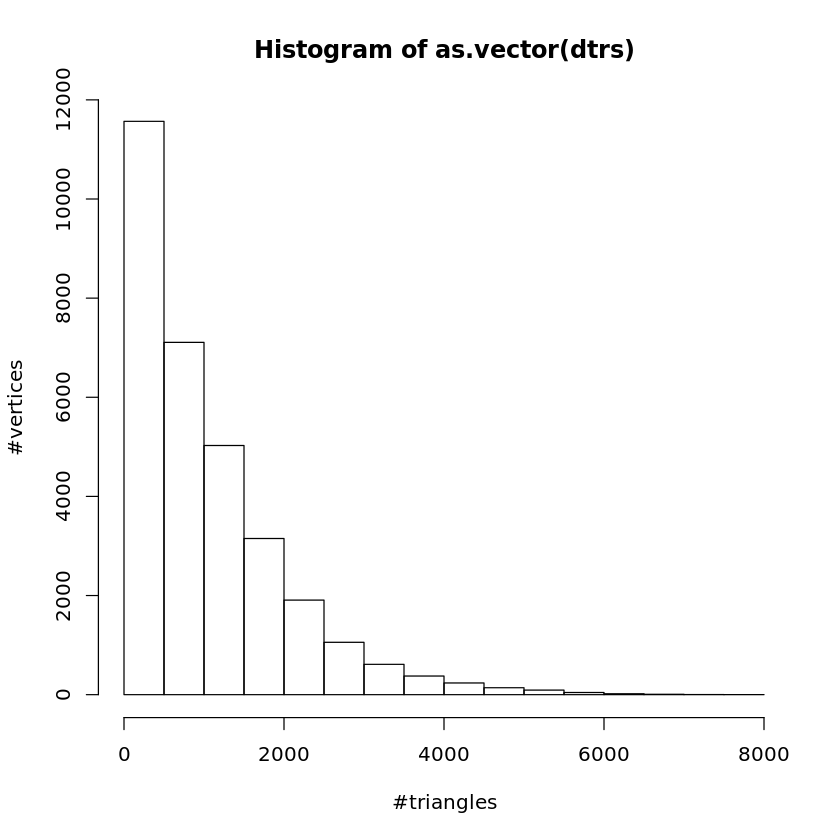

In [16]:
dtrs <- fg.triangles(dg)
hist(as.vector(dtrs), xlab="#triangles", ylab="#vertices")

In [17]:
spm <- fg.get.sparse.matrix(ug)
mul <- function(x, extra) spm %*% x
res <- fm.eigen(mul, 10, nrow(spm), which="LM", sym=TRUE)

In [18]:
library(fpc)

In [19]:
data <- fm.mapply.row(res$vectors, sqrt(res$values), FUN="*")
res <- pamk(as.matrix(data), krange = 2:20, usepam=FALSE, critout=TRUE)

2  clusters  0.1379163 
3  clusters  0.1281709 
4  clusters  0.138217 
5  clusters  0.1201491 
6  clusters  0.1910698 
7  clusters  0.2281747 
8  clusters  0.1808745 
9  clusters  0.2688144 
10  clusters  0.2603055 
11  clusters  0.2462189 
12  clusters  0.2517944 
13  clusters  0.2077625 
14  clusters  0.1905793 
15  clusters  0.2096504 
16  clusters  0.2531863 
17  clusters  0.2095267 
18  clusters  0.2307145 
19  clusters  0.2978553 
20  clusters  0.2434395 
